<a href="https://colab.research.google.com/github/nisharajupal/-Assignment-09-Association_Rules/blob/main/Assignment_09_Association_Rules_Books_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment-09_Association Rules_Books_data

##Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
book= pd.read_csv("/content/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df= pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


#Apriori Algo

In [5]:
frequent_itemsets = apriori(df, min_support=0.10, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


#Compute the antecedent length

In [7]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,1
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,1
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,1
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,1
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,1
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,2
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,1
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,1


#Records with Length 1 Support>=0.10

In [8]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1


#Antecedent length =1

In [9]:
rules[ (rules['antecedent_len'] ==1 ) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
28,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf,1


#Length 2 Support >=0.10

In [10]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
9,0.1650,"(ChildBks, YouthBks)",2
10,0.2560,"(CookBks, ChildBks)",2
11,0.1840,"(DoItYBks, ChildBks)",2
12,0.1515,"(RefBks, ChildBks)",2
13,0.1625,"(ArtBks, ChildBks)",2
14,0.1950,"(GeogBks, ChildBks)",2
15,0.1620,"(CookBks, YouthBks)",2
16,0.1155,"(DoItYBks, YouthBks)",2
17,0.1010,"(ArtBks, YouthBks)",2
18,0.1205,"(GeogBks, YouthBks)",2


#Antecedent length =2

In [11]:
rules[ (rules['antecedent_len'] ==2 ) &
       (rules['confidence'] >= 0.80) &
       (rules['lift'] > 1.8)
    ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
53,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,2
54,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,2
83,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,2
88,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,2
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,2


#Length 3 Support>0.10

In [12]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
29,0.1290,"(CookBks, ChildBks, YouthBks)",3
30,0.1460,"(DoItYBks, CookBks, ChildBks)",3
31,0.1225,"(CookBks, ChildBks, RefBks)",3
32,0.1265,"(CookBks, ChildBks, ArtBks)",3
33,0.1495,"(GeogBks, CookBks, ChildBks)",3
34,0.1045,"(DoItYBks, GeogBks, ChildBks)",3
35,0.1020,"(GeogBks, ArtBks, ChildBks)",3
36,0.1015,"(DoItYBks, CookBks, ArtBks)",3
37,0.1085,"(DoItYBks, GeogBks, CookBks)",3
38,0.1035,"(GeogBks, CookBks, ArtBks)",3


In [13]:
rules['antecedent_len'] ==3  # Since no antecedent len==3 no rules can be formed

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: antecedent_len, Length: 100, dtype: bool

#Forming rules for entire dataset

In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [15]:
df1= rules[ (rules['lift'] >=2) & (rules['support'] >= 0.12) & (rules['confidence']>=0.55)]
df1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.282,0.1460,0.570312,2.022385,0.073808,1.670982
57,(RefBks),"(CookBks, ChildBks)",0.2145,0.256,0.1225,0.571096,2.230842,0.067588,1.734652
66,"(CookBks, ChildBks)",(GeogBks),0.2560,0.276,0.1495,0.583984,2.115885,0.078844,1.740319


In [16]:
df1.sort_values('lift',ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
57,(RefBks),"(CookBks, ChildBks)",0.2145,0.256,0.1225,0.571096,2.230842,0.067588,1.734652
66,"(CookBks, ChildBks)",(GeogBks),0.2560,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
48,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


#Plotting

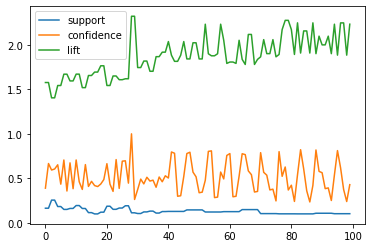

In [17]:
import matplotlib as plt
rules[['support', 'confidence','lift' ]].plot()